In [1]:
# Packages
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import math
import seaborn as sns
import matplotlib.colors as cm
import calendar

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let's make the map first

In [3]:
# Initializing the map
filepath1 = r'/content/drive/MyDrive/Philippines shapefile/gadm41_PHL_1.shp'
PHL = gpd.read_file(filepath1)

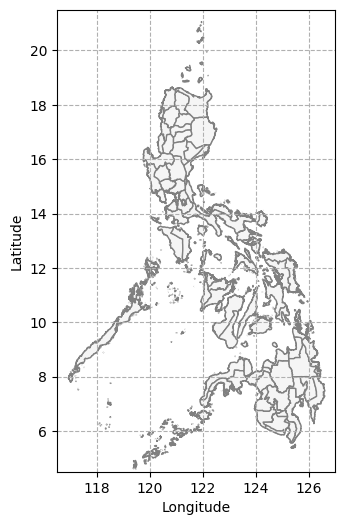

In [11]:
fig, ax = plt.subplots(figsize=(9, 6))
# Axes
ax = PHL.plot(ax=ax, figsize=(10,10), color='whitesmoke', edgecolor='gray')
ax.set_xlim(116.5, 127)
ax.set_ylim(4.5, 21.5)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(linestyle='--')

Now, what we want is to make a mesh of points that we will intersect with the shapefile of the Philippines. The points that intersect with the Philippines are the ones that we are interested in.

In [12]:
mesh_points = []

for x_point in range(116, 127):
  for y_point in range(4, 22):
    mesh_points.append([x_point, y_point])

In [17]:
dx_theo = 0.35
y_values = np.arange(4.5, 21.5, dx_theo)
x_values = np.arange(116.5, 127, dx_theo)

x_mesh, y_mesh = np.meshgrid(x_values, y_values)
xy_points = np.vstack([x_mesh.ravel(), y_mesh.ravel()]).T

In [19]:
dx, dy = np.abs(x_values[1] - x_values[0]), np.abs(y_values[1] - y_values[0])

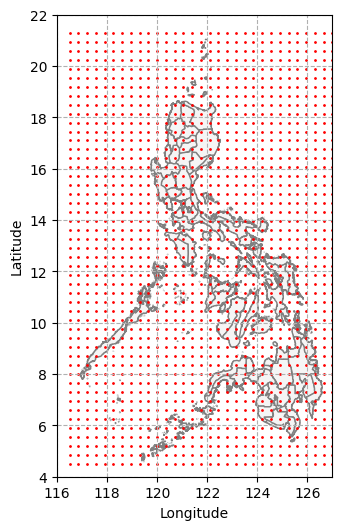

In [20]:
fig, ax = plt.subplots(figsize=(9 ,6))
# Axes
ax = PHL.plot(ax=ax, figsize=(10,10), color='whitesmoke', edgecolor='gray')
ax.set_xlim(116, 127)
ax.set_ylim(4, 22)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(linestyle='--')

# Points
ax.scatter(xy_points[:, 0], xy_points[:, 1], marker='o', color='red', s=1)

In [21]:
# Converting the mesh of points into a geodataframe
geo_points = gpd.GeoDataFrame(xy_points, geometry=gpd.points_from_xy(xy_points[:, 0], xy_points[:, 1]))
geo_points.crs = PHL.crs # making the coordinate system of the two the same

# Intersecting the points to the shapefile
phl_points = gpd.sjoin(geo_points, PHL, how='inner', predicate='within')
phl_points

,0,1,geometry,index_right,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1
72,120.00,5.20,POINT (120 5.2),76,PHL.77_1,PHL,Philippines,Tawi-Tawi,NA,NA,Lalawigan,Province,1570,PH.TT,PH-TAW
73,120.35,5.20,POINT (120.35 5.2),76,PHL.77_1,PHL,Philippines,Tawi-Tawi,NA,NA,Lalawigan,Province,1570,PH.TT,PH-TAW
148,124.90,5.90,POINT (124.9 5.9),66,PHL.67_1,PHL,Philippines,Sarangani,NA,NA,Lalawigan,Province,1280,PH.SG,PH-SAR
149,125.25,5.90,POINT (125.25 5.9),66,PHL.67_1,PHL,Philippines,Sarangani,NA,NA,Lalawigan,Province,1280,PH.SG,PH-SAR
150,125.60,5.90,POINT (125.6 5.9),27,PHL.28_1,PHL,Philippines,Davao del Sur,NA,NA,Lalawigan,Province,1124,PH.DS,PH-DAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,121.75,18.15,POINT (121.75 18.15),17,PHL.18_1,PHL,Philippines,Cagayan,NA,NA,Lalawigan,Province,215,PH.CG,PH-CAG
1225,122.10,18.15,POINT (122.1 18.15),17,PHL.18_1,PHL,Philippines,Cagayan,NA,NA,Lalawigan,Province,215,PH.CG,PH-CAG
1252,120.70,18.50,POINT (120.7 18.5),33,PHL.34_1,PHL,Philippines,Ilocos Norte,NA,NA,Lalawigan,Province,128,PH.IN,PH-ILN
1253,121.05,18.50,POINT (121.05 18.5),6,PHL.7_1,PHL,Philippines,Apayao,NA,NA,Lalawigan,Province,1481,PH.AP,PH-APA


<Axes: xlabel='Longitude', ylabel='Latitude'>

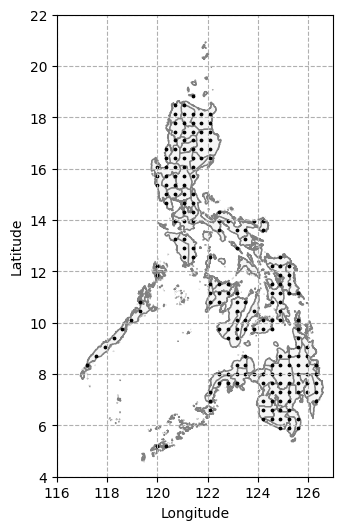

In [22]:
fig, ax = plt.subplots(figsize=(9, 6))
# Axes
ax = PHL.plot(ax=ax, figsize=(10,10), color='whitesmoke', edgecolor='gray')
ax.set_xlim(116, 127)
ax.set_ylim(4, 22)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(linestyle='--')

phl_points.plot(ax=ax, color='black', markersize=3)

In [23]:
# Getting only the coordinates and not the other columns in the PHL shapefile
points_in_phl = phl_points[[0, 1, 'geometry']]
points_in_phl.columns = ['coord.lon', 'coord.lat', 'geometry']
points_in_phl.reset_index(drop=True, inplace=True)

# Making the points have a buffer
square_points = points_in_phl.to_crs(crs=PHL.crs).buffer(dx_theo/2, cap_style=3) # dx_theo/2 is the size of buffer, cap_style=3 makes it square
square_points.reset_index(drop=True, inplace=True)

<ipython-input-23-ad576262bb81>:7: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  square_points = points_in_phl.to_crs(crs=PHL.crs).buffer(dx_theo/2, cap_style=3) # dx_theo/2 is the size of buffer, cap_style=3 makes it square


<Axes: xlabel='Longitude', ylabel='Latitude'>

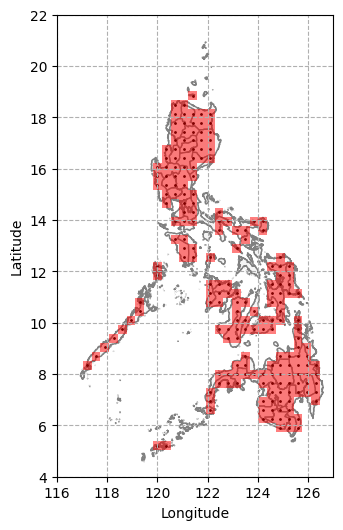

In [24]:
fig, ax = plt.subplots(figsize=(9, 6))
# Axes
ax = PHL.plot(ax=ax, figsize=(10,10), color='whitesmoke', edgecolor='gray')
ax.set_xlim(116, 127)
ax.set_ylim(4, 22)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(linestyle='--')

phl_points.plot(ax=ax, color='black', markersize=1)
square_points.plot(ax=ax, color='red', alpha=0.5)

Let's try making the colors random

In [25]:
colors = plt.cm.viridis(np.linspace(0,1,4))

In [26]:
# Making an RNG to assign each square a random cluster
square_color_idx = np.random.randint(4, size=len(square_points))
square_colors = [cm.rgb2hex(colors[index]) for index in square_color_idx] # converting the color tuple to hex code

<Axes: xlabel='Longitude', ylabel='Latitude'>

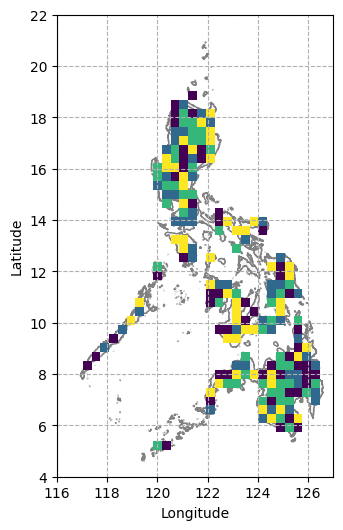

In [27]:
fig, ax = plt.subplots(figsize=(9, 6))
# Axes
ax = PHL.plot(ax=ax, figsize=(10,10), color='whitesmoke', edgecolor='gray')
ax.set_xlim(116, 127)
ax.set_ylim(4, 22)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(linestyle='--')

# phl_points.plot(ax=ax, color='black', markersize=1)
square_points.plot(ax=ax, color=square_colors)

## OpenMeteo API

This is the API that takes weather data from c

In [ ]:
! pip install openmeteo-requests
! pip install requests-cache retry-requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.3 MB/s eta 0:00:00


In [ ]:
import openmeteo_requests
import requests_cache
from retry_requests import retry

In [ ]:
# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

This is the code that Openmeteo provided to get the temperature, rainfall, and windspeed on a given coordinate.

In [ ]:
def get_data(coord_lat, coord_lon, date_start, date_end):
  # Make sure all required weather variables are listed here
  # The order of variables in hourly or daily is important to assign them correctly below
  # Coordinates are floats
  # Date is of the format YYYY-MM-DD and should be a string
  url = "https://historical-forecast-api.open-meteo.com/v1/forecast"
  params = {
    "latitude": coord_lat, # x-values
    "longitude": coord_lon, # y-values
    "start_date": date_start,
    "end_date": date_end,
    "daily": ["temperature_2m_max", "temperature_2m_min", "rain_sum", "wind_speed_10m_max"],
    "timezone": "Asia/Singapore"
  }
  responses = openmeteo.weather_api(url, params=params)

  # Process first location. Add a for-loop for multiple locations or weather models
  response = responses[0]
  print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
  print(f"Elevation {response.Elevation()} m asl")
  print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
  print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

  # Process daily data. The order of variables needs to be the same as requested.
  daily = response.Daily()
  daily_temperature_2m_max = daily.Variables(0).ValuesAsNumpy()
  daily_temperature_2m_min = daily.Variables(1).ValuesAsNumpy()
  daily_rain_sum = daily.Variables(2).ValuesAsNumpy()
  daily_wind_speed_10m_max = daily.Variables(3).ValuesAsNumpy()

  daily_data = {"date": pd.date_range(
    start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
    end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
    freq = pd.Timedelta(seconds = daily.Interval()),
    inclusive = "left"
  )}
  daily_data["temperature_2m_max"] = daily_temperature_2m_max
  daily_data["temperature_2m_min"] = daily_temperature_2m_min
  daily_data["rain_sum"] = daily_rain_sum
  daily_data["wind_speed_10m_max"] = daily_wind_speed_10m_max

  daily_dataframe = pd.DataFrame(data = daily_data)
  return daily_dataframe

In [ ]:
# Importing the package to let the for loop sleep
import time

iteration = 0
all_weather_data = []

for index in range(len(points_in_phl)):
  # Loop sleeps for 1 minute every 50 cities for the API to recover
  if iteration % 50 == 0 and iteration !=0:
    print(f'Waiting 1 minute...')
    time.sleep(60)
    print(f'Iteration: {iteration}')
    city_weather = get_data(points_in_phl.iloc[index]['coord.lat'], points_in_phl.iloc[index]['coord.lon'], '2023-01-01', '2023-12-30')
    all_weather_data.append(city_weather)
    iteration += 1
  else:
    print(f'Iteration: {iteration}')
    city_weather = get_data(points_in_phl.iloc[index]['coord.lat'], points_in_phl.iloc[index]['coord.lon'], '2023-01-01', '2023-12-30')
    all_weather_data.append(city_weather)
    iteration += 1

Iteration: 0
Coordinates 4.75°N 119.5°E
Elevation 10.0 m asl
Timezone b'Asia/Singapore' b'+08'
Timezone difference to GMT+0 28800 s
Iteration: 1
Coordinates 5.125°N 120.125°E
Elevation 4.0 m asl
Timezone b'Asia/Singapore' b'+08'
Timezone difference to GMT+0 28800 s
Iteration: 2
Coordinates 7.0°N 118.5°E
Elevation 40.0 m asl
Timezone b'Asia/Singapore' b'+08'
Timezone difference to GMT+0 28800 s
Iteration: 3
Coordinates 5.75°N 125.25°E
Elevation 51.0 m asl
Timezone b'Asia/Singapore' b'+08'
Timezone difference to GMT+0 28800 s
Iteration: 4
Coordinates 6.0°N 124.75°E
Elevation 516.0 m asl
Timezone b'Asia/Singapore' b'+08'
Timezone difference to GMT+0 28800 s
Iteration: 5
Coordinates 6.0°N 125.0°E
Elevation 628.0 m asl
Timezone b'Asia/Singapore' b'+08'
Timezone difference to GMT+0 28800 s
Iteration: 6
Coordinates 6.0°N 125.5°E
Elevation 1209.0 m asl
Timezone b'Asia/Singapore' b'+08'
Timezone difference to GMT+0 28800 s
Iteration: 7
Coordinates 5.625°N 125.375°E
Elevation 239.0 m asl
Timezon

Let's check if `all_weather_data` has the same length as `square_points`. We don't want to skip any cities, after all.

In [ ]:
len(all_weather_data) == len(square_points)

True

Since the indices of each dataframe is not `datetime`, let's make it the index.

In [ ]:
good_weather_data = []

for df in all_weather_data:
  df_copy = df.copy()
  df_copy = df_copy.set_index('date')
  good_weather_data.append(df_copy)

Let's check whether the data has NaNs.

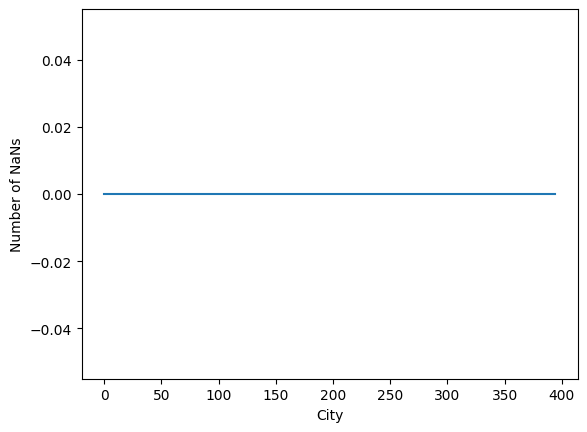

In [ ]:
nan_list = [df.isna().sum().sum() for df in good_weather_data]
plt.ylabel('Number of NaNs')
plt.xlabel('City')
plt.plot(nan_list)

## Exploratory Data Analysis

Now that that's over, let's try to do some EDA.

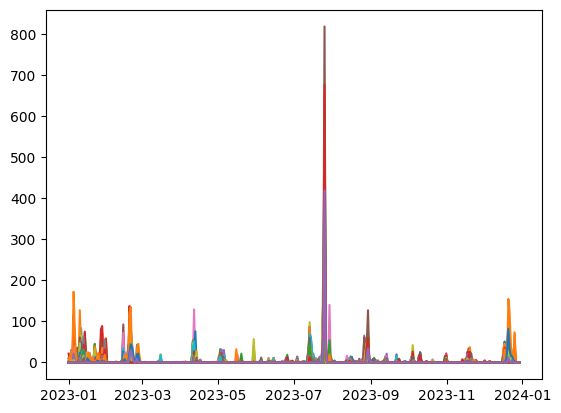

In [ ]:
for df in good_weather_data:
  plt.plot(df.index, df['rain_sum'])

The usual months good for visualizing a variable is given by:
- DJF: Dec, Jan, Feb
- MAM: Mar, Apr, May
- JJA: Jun, Jul, Aug
- SON: Sep, Oct, Nov
as it coincides with the 4 pseudo-seasons of the Philippines.

However, since we have annual data, let's try getting JF, MAM, JJA, SON, and D instead.

In [ ]:
jf_list = [good_weather_data[index]['2023-01-01':'2023-02-28'] for index in range(len(good_weather_data))]
mam_list = [good_weather_data[index]['2023-03-01':'2023-05-31'] for index in range(len(good_weather_data))]
jja_list = [good_weather_data[index]['2023-06-01':'2023-08-31'] for index in range(len(good_weather_data))]
son_list = [good_weather_data[index]['2023-09-01':'2023-11-30'] for index in range(len(good_weather_data))]
d_list = [good_weather_data[index]['2023-12-01':'2023-12-31'] for index in range(len(good_weather_data))]

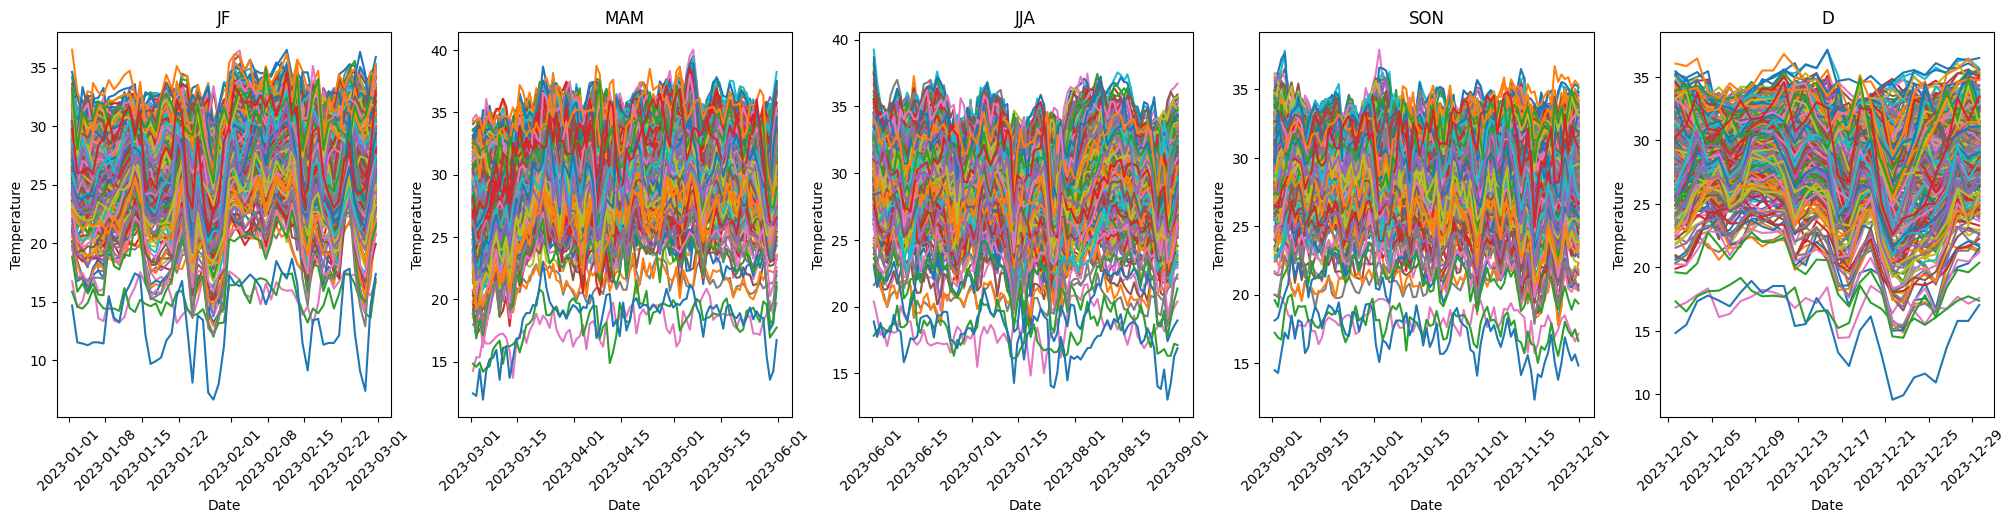

In [ ]:
month_list = [jf_list, mam_list, jja_list, son_list, d_list]
title_list = ['JF', 'MAM', 'JJA', 'SON', 'D']

plt.figure(figsize=(25, 5))
plt.tight_layout()

for month_cluster in range(5):
  plt.subplot(1, 5, month_cluster+1)
  plt.xlabel('Date')
  plt.ylabel('Temperature')
  plt.title(f'{title_list[month_cluster]}')
  plt.tick_params(axis='x', labelrotation=45)
  for df in month_list[month_cluster]:
    plt.plot(df.index, df['temperature_2m_max'])

Now, let's finally look at this in a map. What we need to do is:
- check list in `month_list`
- check each df in each element of `month_list` like `jja_list`
- get average

Let's check one for the months January and February.

In [ ]:
jf_means = np.array([np.round(df['temperature_2m_max'].mean()) for df in jf_list]) # rounding off each mean in the list
jf_min, jf_max = np.min(jf_means), np.max(jf_means)
jf_range = int(jf_max - jf_min)

In [ ]:
jf_temprange = np.arange(jf_min, jf_max + 1)
jf_colorlist = plt.cm.YlOrRd(np.linspace(0, 1, jf_range))

In [ ]:
jf_colors = [cm.rgb2hex(jf_colorlist[int(temp_mean - jf_min - 1)]) for temp_mean in jf_means] # we need to offset it more by subtracting 1 as Python starts from index 0

<Axes: title={'center': 'JF temperature'}, xlabel='Longitude', ylabel='Latitude'>

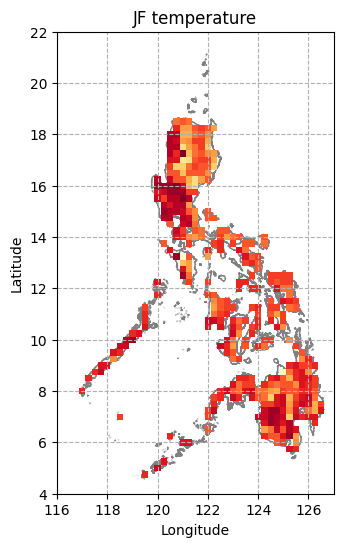

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))
# Axes
ax = PHL.plot(ax=ax, figsize=(10,10), color='whitesmoke', edgecolor='gray')
ax.set_xlim(116, 127)
ax.set_ylim(4, 22)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('JF temperature')
ax.grid(linestyle='--')

# phl_points.plot(ax=ax, color='black', markersize=1)
square_points.plot(ax=ax, color=jf_colors)

However, there isn't a colorbar for this. Since we are using `ax` and not `plt`, we need to make a colorbar of our own. We can make one by following this [link](https://stackoverflow.com/questions/32462881/add-colorbar-to-existing-axis).

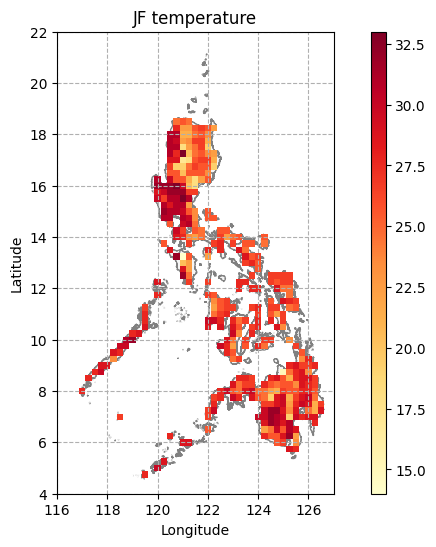

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.cm import ScalarMappable

fig, ax = plt.subplots(figsize=(9, 6))
# Axes
PHL.plot(ax=ax, figsize=(10,10), color='whitesmoke', edgecolor='gray')
ax.set_xlim(116, 127)
ax.set_ylim(4, 22)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('JF temperature')
ax.grid(linestyle='--')

# Square colors
im_points = square_points.plot(ax=ax, color=jf_colors)

# Colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.35)
color_mappable = ScalarMappable(cmap=plt.cm.YlOrRd, norm=plt.Normalize(vmin=jf_min, vmax=jf_max))
fig.colorbar(color_mappable, cax)

Let's make this into a function so we can iterate it many times for the other month clusters.

In [ ]:
def show_map(axis, var_number, month_cluster):
  # Shows the map of the Philippines concerning one variable in a specific timeframe.
  # var_number is either: 0:'temperature_2m_max', 1:'temperature_2m_min', 2:'rain_sum', 3:'wind_speed_10m_max'
  # month_cluster is a list of weather data across all relevant cities divided into a specific timeframe

  # Statistics for the variable
  variable_dict = {0:'temperature_2m_max', 1:'temperature_2m_min', 2:'rain_sum', 3:'wind_speed_10m_max'}
  variable = variable_dict[var_number]
  if var_number == 2: # rainfall needs to be summed, not averaged
    arr_means = np.array([np.round(df[variable].sum()) for df in month_cluster]) # summing up rainfall in the list
  else:
    arr_means = np.array([np.round(df[variable].mean()) for df in month_cluster]) # rounding off each mean in the list
  arr_min, arr_max = np.min(arr_means), np.max(arr_means)
  arr_range = int(arr_max - arr_min)

  # Colors
  arr_temprange = np.arange(arr_min, arr_max + 1)
  if var_number == 0 or var_number == 1: # temperature
    arr_colorlist = plt.cm.YlOrRd(np.linspace(0, 1, arr_range))
  elif var_number == 2: # rain_sum
    arr_colorlist = plt.cm.Blues(np.linspace(0, 1, arr_range))
  else:
    arr_colorlist = plt.cm.GnBu(np.linspace(0, 1, arr_range))
  arr_colors = [cm.rgb2hex(arr_colorlist[int(temp_mean - arr_min - 1)]) for temp_mean in arr_means] # we need to offset it more by subtracting 1 as Python starts from index 0

  # Axes
  PHL.plot(ax=ax, figsize=(10,10), color='whitesmoke', edgecolor='gray')
  ax.set_xlim(116, 127)
  ax.set_ylim(4, 22)
  ax.set_xlabel('Longitude')
  ax.set_ylabel('Latitude')
  ax.grid(linestyle='--')

  # Title
  month_start = calendar.month_name[np.min(month_cluster[0].index.month)][:3]
  month_end = calendar.month_name[np.max(month_cluster[0].index.month)][:3]
  ax.set_title(f'{month_start}-{month_end} {variable}')

  # Square colors
  im_points = square_points.plot(ax=ax, color=arr_colors)

  # Colorbar
  divider = make_axes_locatable(ax)
  cax = divider.append_axes("right", size="5%", pad=0.35)
  if var_number == 0 or var_number == 1: # temperature
    color_mappable = ScalarMappable(cmap=plt.cm.YlOrRd, norm=plt.Normalize(vmin=arr_min, vmax=arr_max))
  elif var_number == 2: # rain_sum
    color_mappable = ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=arr_min, vmax=arr_max))
  else:
    color_mappable = ScalarMappable(cmap=plt.cm.GnBu, norm=plt.Normalize(vmin=arr_min, vmax=arr_max))
  fig.colorbar(color_mappable, cax)

  return None

In [ ]:
def show_map(axis, var_number, month_cluster):
  # Shows the map of the Philippines concerning one variable in a specific timeframe.
  # var_number is either: 0:'temperature_2m_max', 1:'temperature_2m_min', 2:'rain_sum', 3:'wind_speed_10m_max'
  # month_cluster is a list of weather data across all relevant cities divided into a specific timeframe
  # RAINFALL IS AVERAGED HERE

  # Statistics for the variable
  variable_dict = {0:'temperature_2m_max', 1:'temperature_2m_min', 2:'rain_sum', 3:'wind_speed_10m_max'}
  variable = variable_dict[var_number]
  arr_means = np.array([np.round(df[variable].mean()) for df in month_cluster]) # rounding off each mean in the list
  arr_min, arr_max = np.min(arr_means), np.max(arr_means)
  arr_range = int(arr_max - arr_min)

  # Colors
  arr_temprange = np.arange(arr_min, arr_max + 1)
  if var_number == 0 or var_number == 1: # temperature
    arr_colorlist = plt.cm.YlOrRd(np.linspace(0, 1, arr_range))
  elif var_number == 2: # rain_sum
    arr_colorlist = plt.cm.Blues(np.linspace(0, 1, arr_range))
  else:
    arr_colorlist = plt.cm.GnBu(np.linspace(0, 1, arr_range))
  arr_colors = [cm.rgb2hex(arr_colorlist[int(temp_mean - arr_min - 1)]) for temp_mean in arr_means] # we need to offset it more by subtracting 1 as Python starts from index 0

  # Axes
  ax.set_xlim(116, 127)
  ax.set_ylim(4, 22)
  ax.set_xlabel('Longitude')
  ax.set_ylabel('Latitude')
  ax.grid(linestyle='--')

  # Title
  month_start = calendar.month_name[np.min(month_cluster[0].index.month)][:3]
  month_end = calendar.month_name[np.max(month_cluster[0].index.month)][:3]
  ax.set_title(f'{month_start}-{month_end} {variable}')

  # Plotting
  im_points = square_points.plot(ax=ax, color=arr_colors)
  PHL.plot(ax=ax, figsize=(10,10), color='whitesmoke', edgecolor='gray')

  # Colorbar
  divider = make_axes_locatable(ax)
  cax = divider.append_axes("right", size="5%", pad=0.35)
  if var_number == 0 or var_number == 1: # temperature
    color_mappable = ScalarMappable(cmap=plt.cm.YlOrRd, norm=plt.Normalize(vmin=arr_min, vmax=arr_max))
  elif var_number == 2: # rain_sum
    color_mappable = ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=arr_min, vmax=arr_max))
  else:
    color_mappable = ScalarMappable(cmap=plt.cm.GnBu, norm=plt.Normalize(vmin=arr_min, vmax=arr_max))
  fig.colorbar(color_mappable, cax)

  return None

Now, let's visualize the temperature of the Philippines throughout the year.

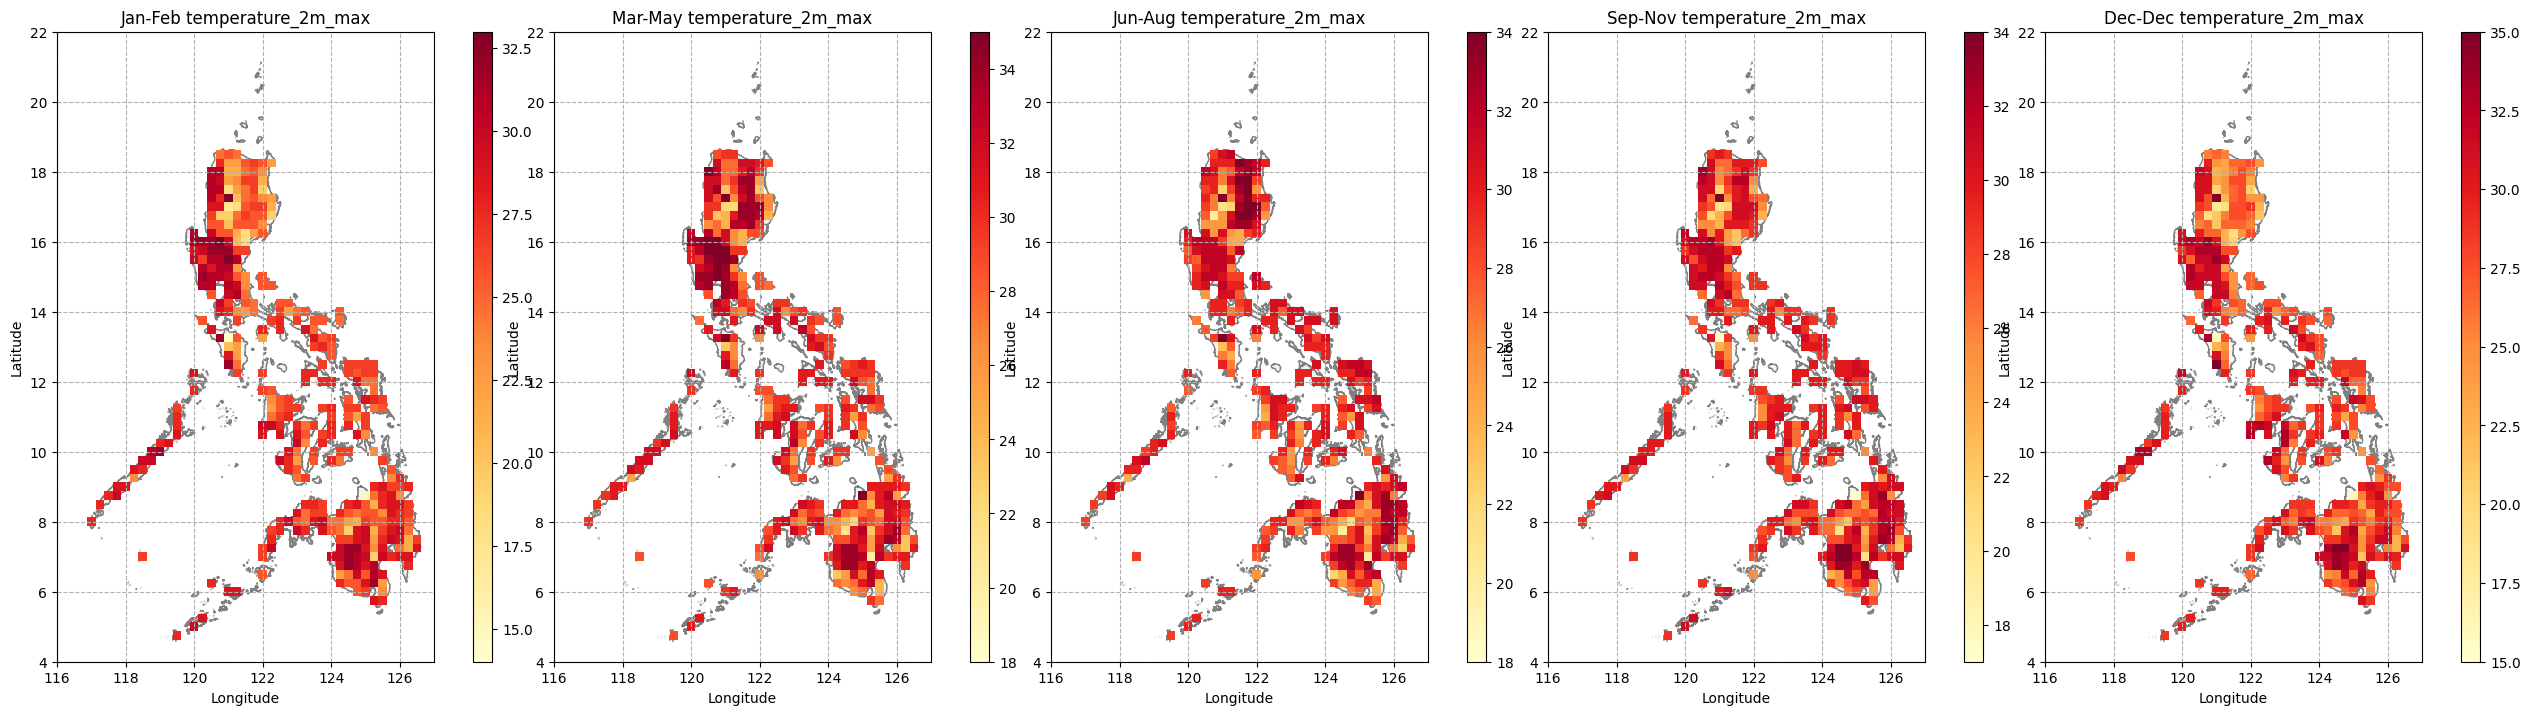

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(25, 7))
plt.tight_layout()

for month_cluster in range(5):
  ax = axes[month_cluster]
  show_map(ax, 0, month_list[month_cluster])

Let's check the rainfall.

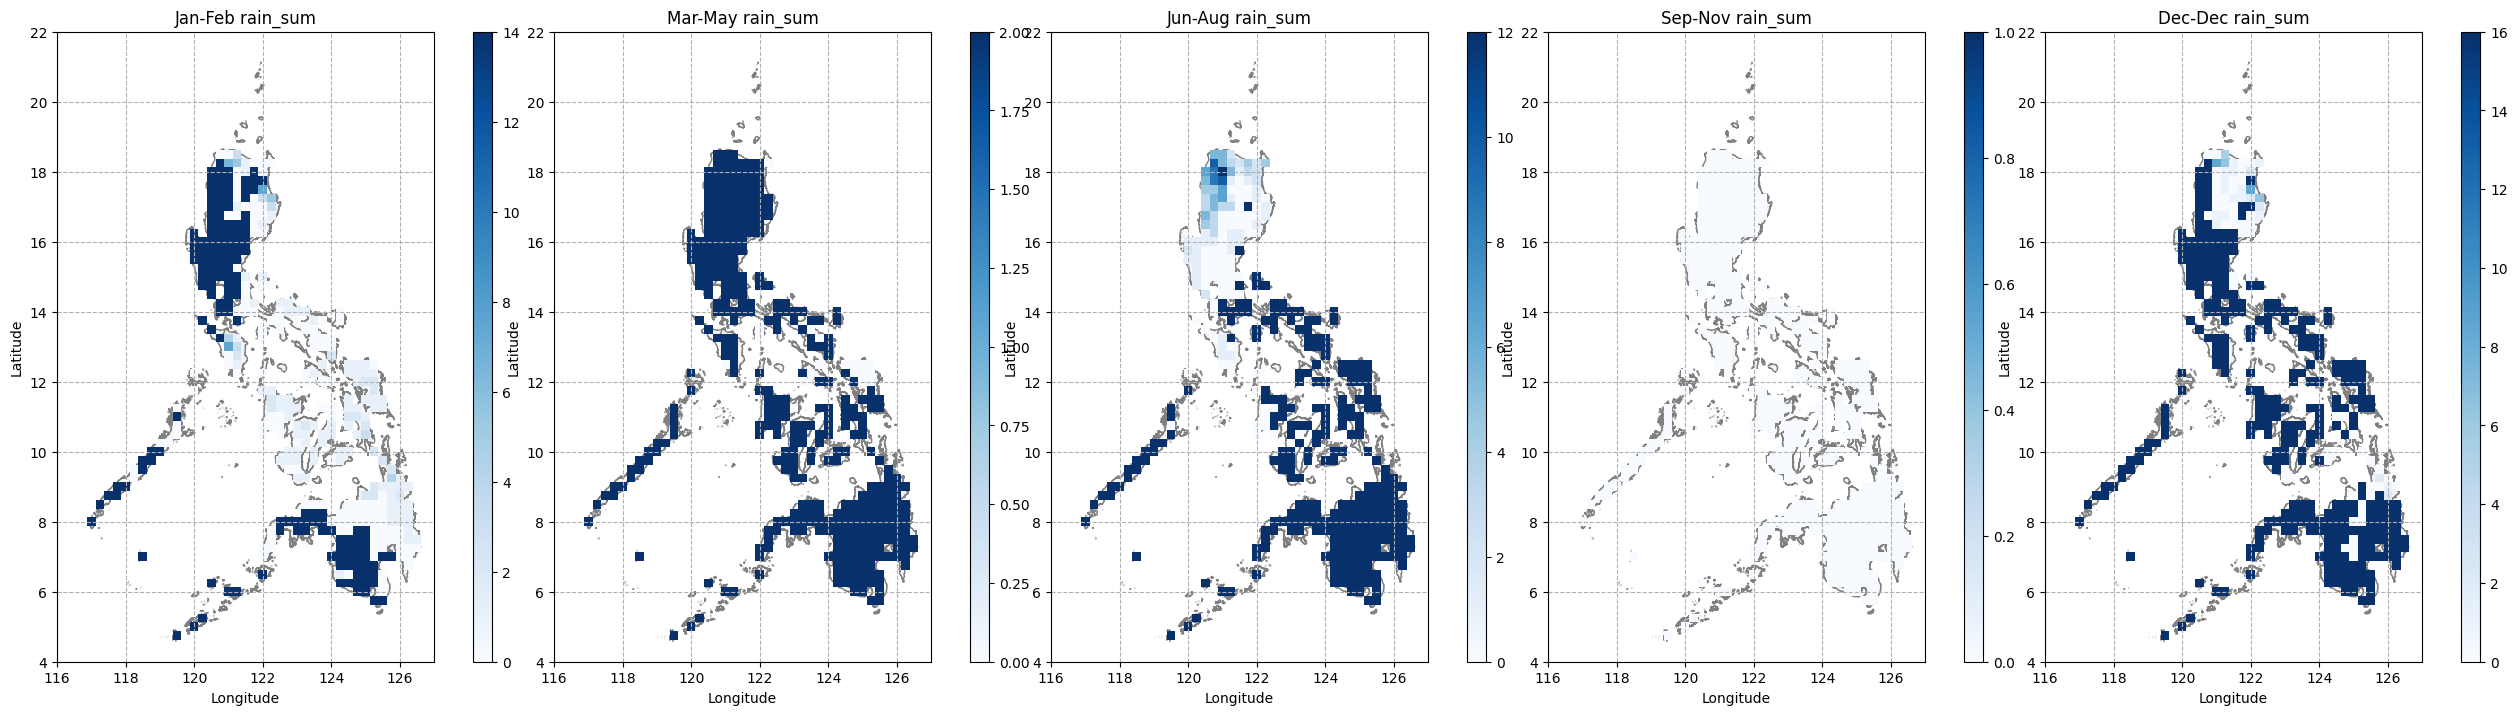

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(25, 7))
plt.tight_layout()

for month_cluster in range(5):
  ax = axes[month_cluster]
  show_map(ax, 2, month_list[month_cluster])

Let's check the wind speed.

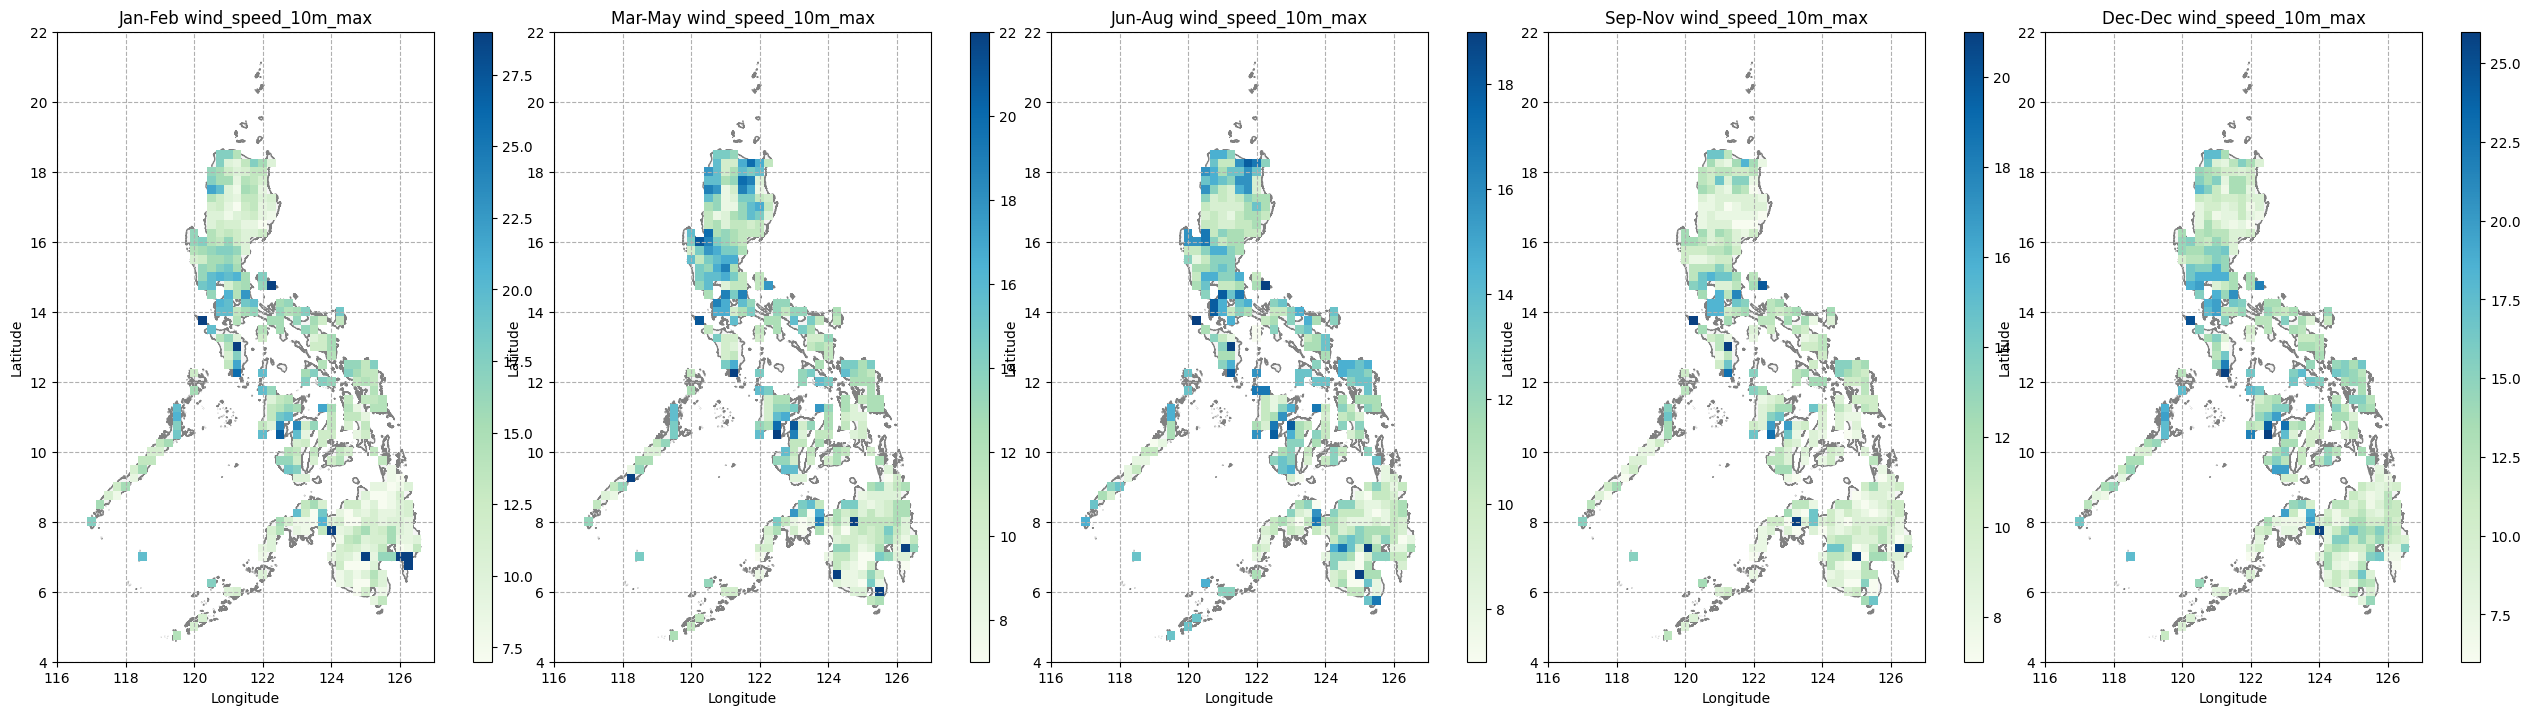

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(25, 7))
plt.tight_layout()

for month_cluster in range(5):
  ax = axes[month_cluster]
  show_map(ax, 3, month_list[month_cluster])

However, as you can see, we do not see a proper comparison with the variables. The minimums and maximums of the variables change as months pass. Let's have the colorbar be the same for each month cluster.

Looking at the Jun-Aug rainfall plot though, it is absurd that we get such high rainfall amounts thus the sensitivity of the plot decreases. Instead of having the largest range be the same for every plot, we should have the second largest range be the same for every plot.

But, if plots are averaged, we can just get the maximum range and use that as the colorbar.

In [ ]:
def monthly_map(var_number):
  # Shows the map of the Philippines concerning one variable over a year.
  # var_number is either: 0:'temperature_2m_max', 1:'temperature_2m_min', 2:'rain_sum', 3:'wind_speed_10m_max'
  fig, axes = plt.subplots(1, 5, figsize=(25, 7))
  plt.tight_layout()

  # Statistics for the variable
  variable_dict = {0:'temperature_2m_max', 1:'temperature_2m_min', 2:'rain_sum', 3:'wind_speed_10m_max'}
  variable = variable_dict[var_number]

  # General colorbar variables
  month_mins = [min([np.round(df[variable].mean()) for df in month_cluster]) for month_cluster in month_list]
  month_maxs = [max([np.round(df[variable].mean()) for df in month_cluster]) for month_cluster in month_list]
  month_ranges = [month_maxs[index] - month_mins[index] for index in range(5)]

  max_range_idx = month_ranges.index(max(month_ranges))
  bar_min, bar_max = month_mins[max_range_idx], month_maxs[max_range_idx]

  for month_index, month_cluster in enumerate(month_list):
    # Axes
    ax = axes[month_index]

    # Statistics for monthly variable
    arr_means = np.array([np.round(df[variable].mean()) for df in month_cluster]) # rounding off each mean in the list
    arr_min, arr_max = np.min(arr_means), np.max(arr_means)
    arr_range = int(arr_max - arr_min)

    # Colors
    arr_temprange = np.arange(arr_min, arr_max + 1)
    if var_number == 0 or var_number == 1: # temperature
      arr_colorlist = plt.cm.YlOrRd(np.linspace(0, 1, arr_range))
    elif var_number == 2: # rain_sum
      arr_colorlist = plt.cm.Blues(np.linspace(0, 1, arr_range))
    else:
      arr_colorlist = plt.cm.GnBu(np.linspace(0, 1, arr_range))
    arr_colors = [cm.rgb2hex(arr_colorlist[int(temp_mean - arr_min - 1)]) for temp_mean in arr_means] # we need to offset it more by subtracting 1 as Python starts from index 0

    # Axes
    ax.set_xlim(116, 127)
    ax.set_ylim(4, 22)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.grid(linestyle='--')

    # Title
    month_start = calendar.month_name[np.min(month_cluster[0].index.month)][:3]
    month_end = calendar.month_name[np.max(month_cluster[0].index.month)][:3]
    ax.set_title(f'{month_start}-{month_end} {variable}')

    # Plotting
    im_points = square_points.plot(ax=ax, color=arr_colors)
    PHL.plot(ax=ax, figsize=(10,10), color='none', edgecolor='black')

    # Colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.35)
    if var_number == 0 or var_number == 1: # temperature
      color_mappable = ScalarMappable(cmap=plt.cm.YlOrRd, norm=plt.Normalize(vmin=bar_min, vmax=bar_max))
    elif var_number == 2: # rain_sum
      color_mappable = ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=bar_min, vmax=bar_max))
    else:
      color_mappable = ScalarMappable(cmap=plt.cm.GnBu, norm=plt.Normalize(vmin=bar_min, vmax=bar_max))
    fig.colorbar(color_mappable, cax)

  return None

In [ ]:
from google.colab import files

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

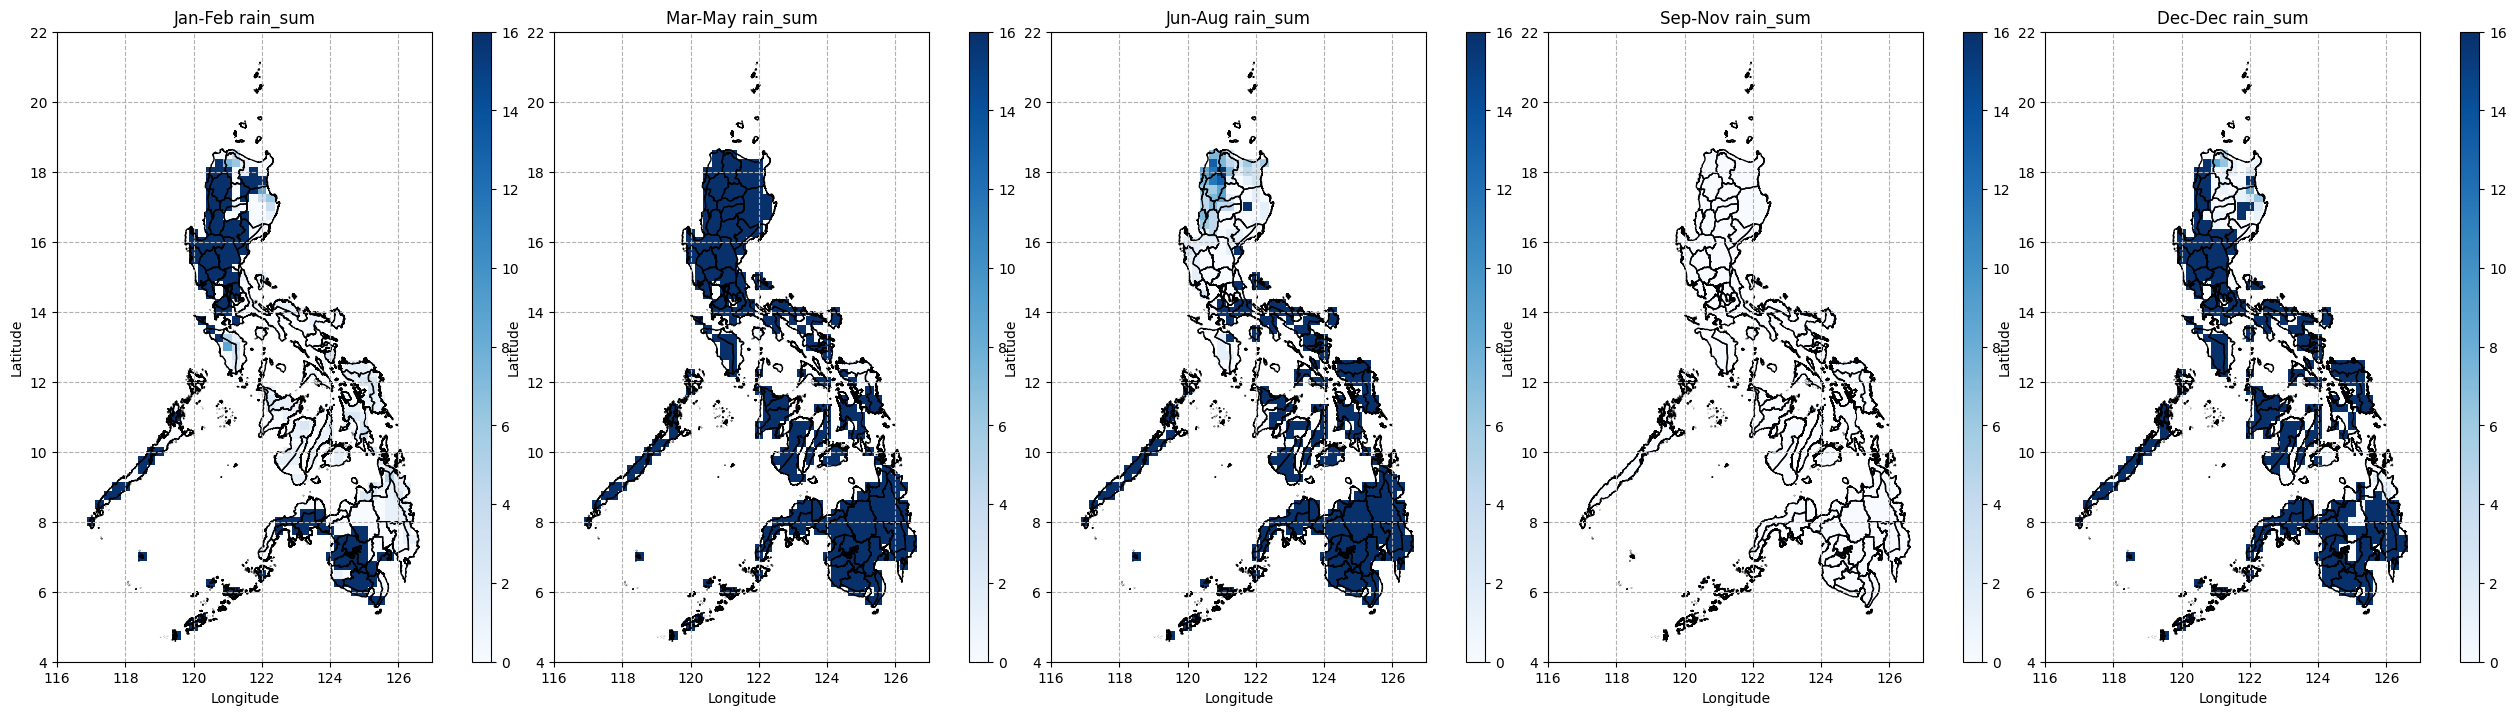

In [ ]:
monthly_map(2)

plt.savefig('rainfall in the PH.png', dpi=300)
files.download('rainfall in the PH.png')

# Clustering proper

## Principal component analysis

In [ ]:
# Importing
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

In [ ]:
norm_weather_data = [normalize(df) for df in good_weather_data]

In [ ]:
np.array(norm_weather_data).shape

(395, 364, 4)

In [ ]:
pca = PCA(n_components=3)
weather_pcas = []
eigvals = []

for df in norm_weather_data:
  city_pca = pca.fit_transform(df)
  city_pca = pd.DataFrame(city_pca)
  city_pca.columns = ['PCA_1', 'PCA_2', 'PCA_3']
  weather_pcas.append(city_pca)
  eigval = pca.explained_variance_
  eigvals.append(eigval)

Text(0.5, 0, 'PCA components')

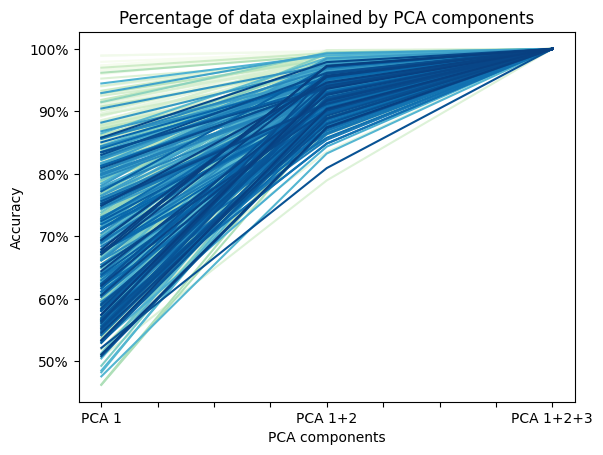

In [ ]:
import matplotlib.ticker as mticker

fig, ax = plt.subplots()
colors = plt.cm.GnBu(np.linspace(0, 1, len(eigvals)))

ax.set_title('Percentage of data explained by PCA components')
# Looping through each city
for idx in range(len(eigvals)):
    ax.plot(np.cumsum(eigvals[idx])/np.sum(eigvals[idx]), color=colors[idx])

def update_ticks(x, pos):
    if x == 0:
        return 'PCA 1'
    elif x == 1:
        return 'PCA 1+2'
    elif x == 2:
        return 'PCA 1+2+3'

# Formatting x and y axis
ax.xaxis.set_major_formatter(mticker.FuncFormatter(update_ticks))
ax.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))
ax.set_ylabel('Accuracy')
ax.set_xlabel('PCA components')

## Clustering with/without PCA

In [ ]:
! pip install tslearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 25.4 MB/s eta 0:00:00


In [ ]:
km_pca = [np.array(df) for df in weather_pcas]

In [ ]:
km_pca[0]

array([[ 0.04138505,  0.01287766, -0.00563573],
       [ 0.15332168, -0.00412747,  0.00516266],
       [ 0.08530412, -0.0091493 , -0.00133286],
       ...,
       [-0.03667917, -0.00317257, -0.00291271],
       [-0.01655066, -0.01493802, -0.0024629 ],
       [-0.13646856, -0.01076749,  0.00838296]], dtype=float32)

In [ ]:
km_pca1 = [np.array(weather_pcas[city]) for city in range(len(weather_pcas))]

Let's see whether `km_pca` and `km_pca1` are the same.

In [ ]:
sum([(km_pca[0] == km_pca1[0]).all() for i in range(len(km_pca))])

395

Importing the functions that we need for clustering,

In [ ]:
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from tslearn.barycenters import dtw_barycenter_averaging
from sklearn.cluster import KMeans

Let's do silhouette score analysis to know what the optimal amount of cluster is.

In [ ]:
silhouettes = []

for i in range(2, 6):
  cluster_count = i
  km = TimeSeriesKMeans(n_clusters=cluster_count, metric="dtw")
  labels = km.fit_predict(km_pca)
  silhouette = silhouette_score(km_pca, labels, metric='dtw')
  silhouettes.append(silhouette)

KeyboardInterrupt: 

Text(0.5, 1.0, 'Optimal amount of clusters')

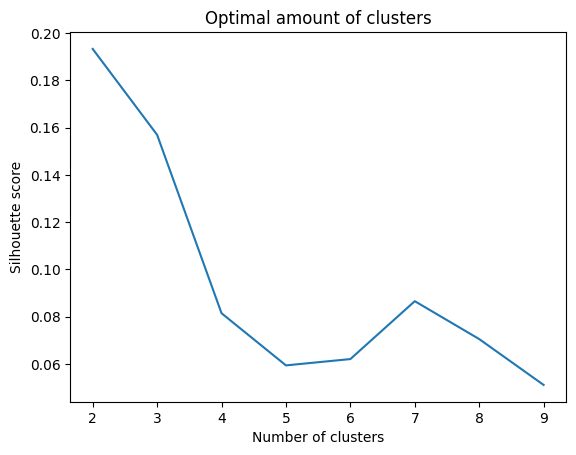

In [ ]:
x_ticks = np.arange(2, 10, 1)
plt.plot(x_ticks, silhouettes)
plt.ylabel('Silhouette score')
plt.xlabel('Number of clusters')
plt.title('Optimal amount of clusters')

In [ ]:
km_2 = TimeSeriesKMeans(n_clusters=2, metric="dtw")
km_labels_2 = km_2.fit_predict(km_pca)

km_3 = TimeSeriesKMeans(n_clusters=3, metric="dtw")
km_labels_3 = km_3.fit_predict(km_pca)

km_4 = TimeSeriesKMeans(n_clusters=4, metric="dtw")
km_labels_4 = km_4.fit_predict(km_pca)

Applying the colors onto the map, we get:

In [ ]:
km_label_list = [km_labels_2, km_labels_3, km_labels_4]

In [ ]:
def km_colorgen(label_list):
  # returns a list of colors for the labels returned by tslearn
  n_cluster = len(np.unique(label_list))
  km_colors = plt.cm.viridis(np.linspace(0, 1, n_cluster))
  km_colorlabels = [cm.rgb2hex(km_colors[label]) for label in label_list]
  return km_colorlabels

Let's make a quick function for the deployment of these maps

In [ ]:
def show_colormap(ax, color_label):
  # Axes
  ax.set_xlim(116, 127)
  ax.set_ylim(4, 22)
  ax.set_xlabel('Longitude')
  ax.set_ylabel('Latitude')

  n_cluster = len(np.unique(color_label))
  ax.set_title(f'Number of clusters: {n_cluster}')

  # Plotting
  square_points.plot(ax=ax, color=color_label)
  ax = PHL.plot(ax=ax, figsize=(10,10), color='none', edgecolor='black')

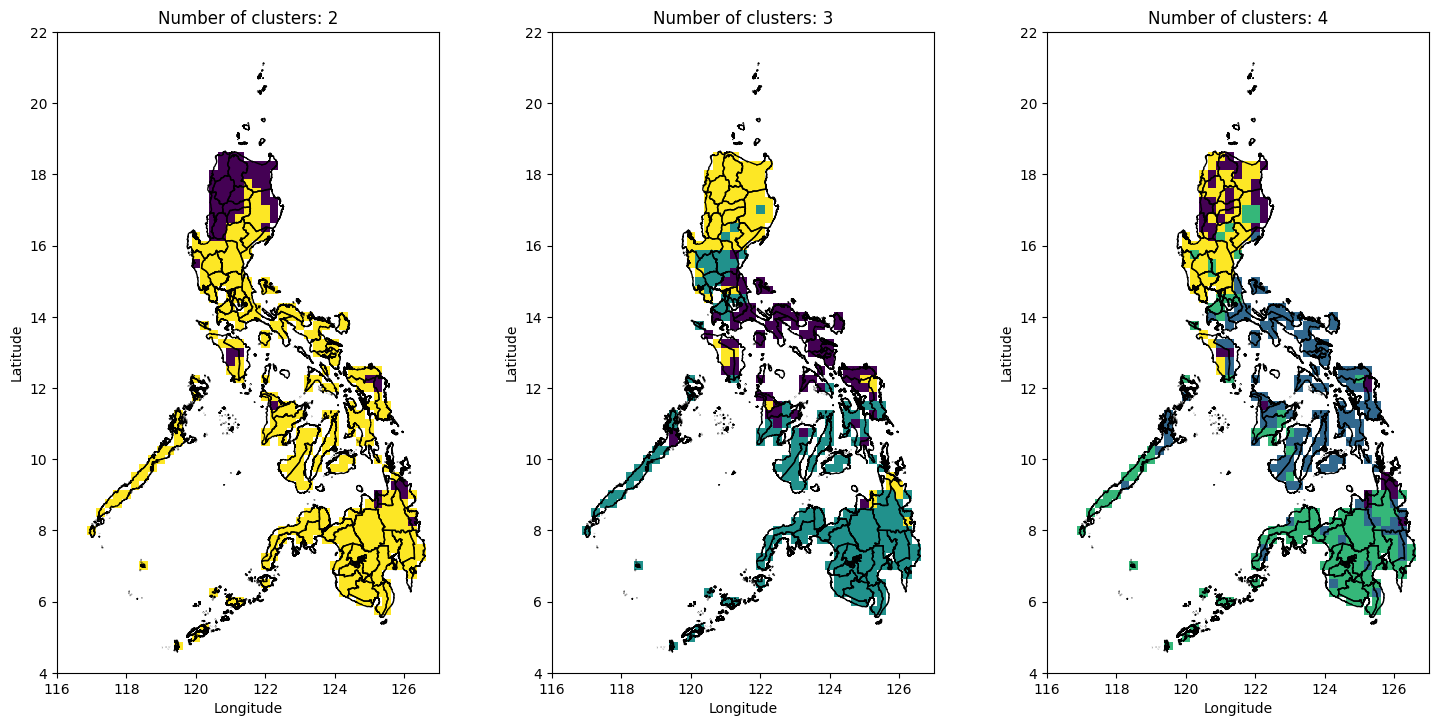

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 7))
plt.tight_layout()

for i in range(3):
  ax = axes[i]
  show_colormap(ax, km_colorgen(km_label_list[i]))